In [24]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from mpl_toolkits.basemap import Basemap
plt.style.use('seaborn-colorblind')
%matplotlib inline
%config IPCompleter.greedy=True

In [3]:
df=pd.read_csv('breach_report.csv')

In [4]:
df.dtypes

Name of Covered Entity               object
State                                object
Covered Entity Type                  object
Individuals Affected                float64
Breach Submission Date               object
Type of Breach                       object
Location of Breached Information     object
Business Associate Present           object
Web Description                      object
Day                                   int64
Month                                 int64
Year                                  int64
dtype: object

In [5]:
df['Individuals Affected'].describe()

count    1.646000e+03
mean     1.024573e+05
std      1.997579e+06
min      5.000000e+02
25%      9.982500e+02
50%      2.300000e+03
75%      7.599750e+03
max      7.880000e+07
Name: Individuals Affected, dtype: float64

In [6]:
df['Type of Breach'].describe()

count      1655
unique       28
top       Theft
freq        713
Name: Type of Breach, dtype: object

In [7]:
df['Type of Breach'].unique()

array(['Theft', 'Loss', 'Other', nan, 'Hacking/IT Incident', 'Loss, Theft',
       'Improper Disposal', 'Improper Disposal, Loss', 'Other, Theft',
       'Loss, Other', 'Unauthorized Access/Disclosure',
       'Improper Disposal, Loss, Theft', 'Unknown',
       'Theft, Unauthorized Access/Disclosure',
       'Hacking/IT Incident, Unauthorized Access/Disclosure',
       'Other, Unauthorized Access/Disclosure',
       'Hacking/IT Incident, Other', 'Other, Unknown',
       'Loss, Unauthorized Access/Disclosure, Unknown',
       'Hacking/IT Incident, Other, Unauthorized Access/Disclosure',
       'Hacking/IT Incident, Theft, Unauthorized Access/Disclosure',
       'Improper Disposal, Theft', 'Hacking/IT Incident, Theft',
       'Loss, Other, Theft',
       'Other, Theft, Unauthorized Access/Disclosure',
       'Improper Disposal, Theft, Unauthorized Access/Disclosure',
       'Loss, Unknown', 'Loss, Unauthorized Access/Disclosure',
       'Improper Disposal, Unauthorized Access/Disclosure'

In [8]:
df['Covered Entity Type'].describe()

count                    1658
unique                      4
top       Healthcare Provider
freq                     1173
Name: Covered Entity Type, dtype: object

In [9]:
df['Covered Entity Type'].unique()

array(['Healthcare Provider', 'Health Plan', 'Business Associate',
       'Healthcare Clearing House'], dtype=object)

In [10]:
indices = df['Covered Entity Type'] == 'Healthcare Provider'

In [11]:
HC_provider=df.loc[indices,:]##extract new data frame

In [12]:
HC_provider.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Day,Month,Year
0,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,10/21/09,Theft,Paper/Films,No,A binder containing the protected health infor...,21,10,2009
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,10/28/09,Theft,Network Server,No,Five desktop computers containing unencrypted ...,28,10,2009
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,10/30/09,Theft,"Other, Other Portable Electronic Device",No,\N,30,10,2009
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,11/20/09,Theft,Desktop Computer,No,A shared Computer that was used for backup was...,20,11,2009
5,"L. Douglas Carlson, M.D.",CA,Healthcare Provider,5257.0,11/20/09,Theft,Desktop Computer,No,A shared Computer that was used for backup was...,20,11,2009


In [13]:
indices = df['Covered Entity Type'] == 'Health Plan'

In [14]:
healthplan=df.loc[indices,:]##extract new data frame

In [15]:
healthplan.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Day,Month,Year
3,Health Services for Children with Special Need...,DC,Health Plan,3800.0,11/17/09,Loss,Laptop,No,A laptop was lost by an employee while in tran...,17,11,2009
38,"State of TN, Bureau of TennCare",TN,Health Plan,3900.0,2/19/10,Theft,Paper/Films,No,The covered entity (CE) mailed the wrong infor...,19,2,2010
44,Wyoming Department of Health,WY,Health Plan,9023.0,3/2/10,NaN,Network Server,No,\N,2,3,2010
45,Thrivent Financial for Lutherans,WI,Health Plan,9500.0,3/3/10,Theft,Laptop,No,"On January 29, 2010, there was a break-in at o...",3,3,2010
61,"Affinity Health Plan, Inc.",NY,Health Plan,344579.0,4/14/10,Theft,Other,No,Under a settlement with the U.S. Department of...,14,4,2010


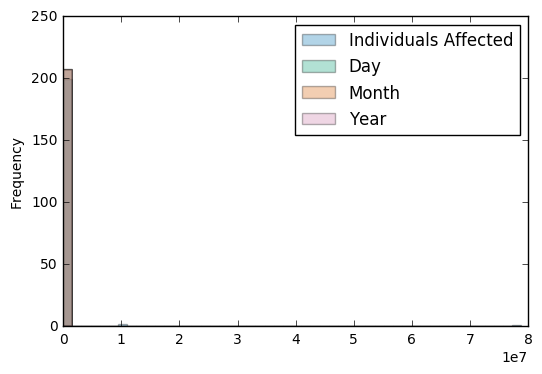

In [16]:
healthplan.plot(kind='hist',bins=50, alpha=.3)

In [17]:
loc=df['Location of Breached Information'].value_counts()

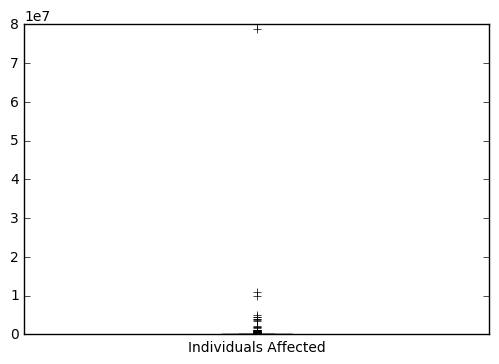

In [18]:
df.plot(y='Individuals Affected', kind='box')

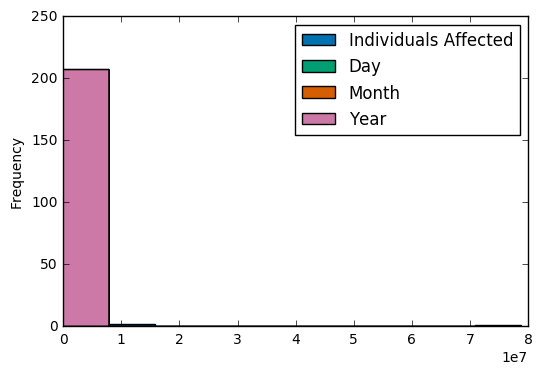

In [19]:
healthplan.plot(x='Type of Breach', kind='hist')

In [20]:
describe_all = df.describe()

In [21]:
print(describe_all)

       Individuals Affected          Day        Month         Year
count          1.646000e+03  1658.000000  1658.000000  1658.000000
mean           1.024573e+05    15.951146     6.413752  2013.174910
std            1.997579e+06     8.706266     3.351304     1.978349
min            5.000000e+02     1.000000     1.000000  2009.000000
25%            9.982500e+02     9.000000     4.000000  2012.000000
50%            2.300000e+03    15.000000     6.000000  2013.000000
75%            7.599750e+03    23.750000     9.000000  2015.000000
max            7.880000e+07    31.000000    12.000000  2016.000000


In [22]:
describe_healthplan=healthplan.describe()

In [23]:
describe_hcprovider=HC_provider.describe()

In [25]:
wd=df['Web Description']

In [26]:
wd.head()

0    A binder containing the protected health infor...
1    Five desktop computers containing unencrypted ...
2                                                   \N
3    A laptop was lost by an employee while in tran...
4    A shared Computer that was used for backup was...
Name: Web Description, dtype: object

In [27]:
wd.describe()

count     1271
unique     666
top         \N
freq       598
Name: Web Description, dtype: object

In [37]:
wd2.describe()

count     1271
unique     666
top          \
freq       598
Name: Web Description, dtype: object

In [68]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [70]:
df2=pd.read_csv('webdes.csv')

In [71]:
df2.describe()

,Web Description,Unnamed: 1
count,1610,10
unique,752,10
top,\N,A training program covering the requirements o...
freq,598,1


In [73]:
df2.dtypes

Web Description    object
Unnamed: 1         object
dtype: object